In [102]:
# importing libraries.

import my_utils

import html
import time
import functools
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords as sw
import string
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression




In [109]:
df = pd.read_csv('tweets.csv')

In [147]:
df.shape


(31962, 3)

In [113]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...


In [118]:
df.sample(n=8)

,id,label,tweet
18934,18935,0,best #lawofattraction #resources for #healing!...
26698,26699,0,download happy slow cooking pdf mobi epub fa...
14839,14840,0,i love this city x #love #life #beautiful #...
27766,27767,0,@user chillin' + laughin' ð #friends #in...
3977,3978,0,hating the writers so much right now so much #...
22154,22155,0,shopping for my girl's bachelorette pay. ð
24669,24670,0,ohh no how?
5510,5511,1,@user trump campaign official wants michelle o...


In [119]:
df=df.dropna()
df = df.reset_index(drop=True)
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [32]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [33]:
df.shape

(31962, 3)

In [120]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [121]:
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

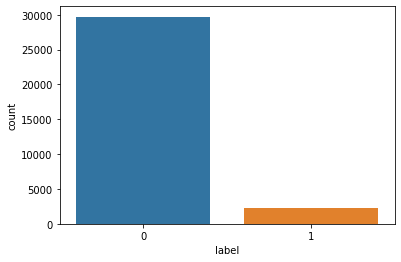

In [154]:
sns.countplot(x= 'label', data = df)

In [155]:
# Sample positive reveiws to get a balanced dataset
neg = df.loc[df.label==1]
pos = df.loc[df.label==0].sample(n=df.label.value_counts()[1], random_state=42)

In [156]:
print(type(pos))
print("pos:", len(pos), ", neg:", len(neg))

<class 'pandas.core.frame.DataFrame'>
pos: 2242 , neg: 2242


In [157]:
pos

,id,label,tweet
8824,8825,0,#body to body massage with a ending oil #mas...
31854,31855,0,@user @ my call back! #casting #castingcall ...
28079,28080,0,help creates the #environment of #togetherness...
29214,29215,0,summer with friendâ¨ð¥ #summer #friend #li...
20025,20026,0,follow me on snapchat at awesomecutenes7 #snap...
...,...,...,...
5511,5512,0,a productive day. âº
13245,13246,0,bihday ððð #gsãã #ã¹ã¼ãã...
22388,22389,0,need these cushions in my life ð©
10370,10371,0,i swear i saw driver at the sta it didnt look ...


<AxesSubplot:xlabel='label', ylabel='count'>

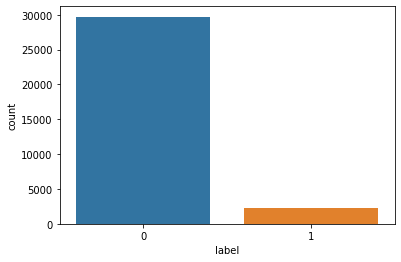

In [158]:
sns.countplot(x= 'label',data = df)

In [159]:
neg

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [160]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [161]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sawan Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sawan Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Sawan Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\Sawan
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_sample

True

In [162]:
# define the preprocessing function 

lemmatizer = nltk.WordNetLemmatizer()
stopwords = sw.words('english')
stopwords = stopwords + ['not_' + w for w in stopwords]

# transform punctuation to blanks
trans_punct = str.maketrans(string.punctuation,' '*len(string.punctuation)) 

# pad punctuation with blanks
pad_punct = str.maketrans({key: " {0} ".format(key) for key in string.punctuation}) 
# remove "_" from string.punctuation
invalidChars = str(string.punctuation.replace("_", ""))  

In [163]:
def preprocessing(line, ngram=1, neg_handling=True, remove_stop=False):
    """
    Preprocessing the review texts
    @params:
        line                       - Required: the input text (Str)
        ngram                  - Optional: number n in the n-gram model(Int, 1, 2, or 3)
        neg_handling       - Optional: whether to perform negation handling (Boolean)
        remove_stop        -Optional: whether to remove the stop words (Boolean)
    """
        
    line = html.unescape(str(line))
    line = str(line).replace("can't", "can not")
    line = str(line).replace("n't", " not")
    
    if neg_handling:
        line = str(line).translate(pad_punct)  # If performing negation handling, pad punctuations with blanks
        line = nltk.word_tokenize(line.lower()) # Word normalization and tokenization
        tokens = []
        negated = False
        for t in line:
            if t in ['not', 'no']:
                negated = not negated
            elif t in string.punctuation or not t.isalpha():
                negated = False
            else:
                tokens.append('not_' + t if negated else t)  # add "not_" prefix to words behind "not", or "no"     
    else:
        line = str(line).translate(trans_punct)  # If not performing negation handling, remove punctuations
        line = nltk.word_tokenize(line.lower()) # Word normalization and tokenization
        tokens = line
    
    if ngram==2:
        bi_tokens = list(nltk.bigrams(line))
        bi_tokens = list(map('_'.join, bi_tokens))
        bi_tokens = [i for i in bi_tokens if all(j not in invalidChars for j in i)]
        tokens = tokens + bi_tokens

    if ngram==3:
        bi_tokens = list(nltk.bigrams(line))
        bi_tokens = list(map('_'.join, bi_tokens))
        bi_tokens = [i for i in bi_tokens if all(j not in invalidChars for j in i)]
        tri_tokens = list(nltk.trigrams(line))
        tri_tokens = list(map('_'.join, tri_tokens))
        tri_tokens = [i for i in tri_tokens if all(j not in invalidChars for j in i)]
        tokens = tokens + bi_tokens + tri_tokens    
     
    if remove_stop:
        line = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords]
    else:
        line = [lemmatizer.lemmatize(t) for t in tokens] 
    
    return ' '.join(line)

In [164]:

line = "I don't think this mannual has any relevent information!!! It is full of typos and factual errors that I can't ignore."

preprocessing(line, ngram=1, neg_handling=False, remove_stop=False)

'i do not think this mannual ha any relevent information it is full of typo and factual error that i can not ignore'

In [165]:
preprocessing(line, ngram=1, neg_handling=False, remove_stop=True)


'think mannual relevent information full typo factual error ignore'

In [166]:
preprocessing(line, ngram=1, neg_handling=True, remove_stop=False)

'i do not_think not_this not_mannual not_has not_any not_relevent not_information it is full of typo and factual error that i can not_ignore'

In [167]:
preprocessing(line, ngram=3, neg_handling=True, remove_stop=False)


'i do not_think not_this not_mannual not_has not_any not_relevent not_information it is full of typo and factual error that i can not_ignore i_do do_not not_think think_this this_mannual mannual_has has_any any_relevent relevent_information it_is is_full full_of of_typos typos_and and_factual factual_errors errors_that that_i i_can can_not not_ignore i_do_not do_not_think not_think_this think_this_mannual this_mannual_has mannual_has_any has_any_relevent any_relevent_information it_is_full is_full_of full_of_typos of_typos_and typos_and_factual and_factual_errors factual_errors_that errors_that_i that_i_can i_can_not can_not_ignore'

In [168]:
#  preprocessing the data
# Perform data preprocessing with negation handling, tri-gram modeling, without removing the stop words

# preprocessing the positive reviews

pos_data = []
n_pos = len(pos)
for i, p in enumerate(pos['tweet']):
    pos_data.append(preprocessing(p, ngram=3))
    #my_utils.print_progress(bar_length=50, decimals=0, iteration=i+1, total=n_pos, prefix='Preprocessing pos data: ')


In [169]:
# preprocessing the negative reviews

neg_data = []
n_neg = len(neg)
for i, n in enumerate(neg['tweet']):
    neg_data.append(preprocessing(n, ngram=3))
    #my_utils.print_progress(bar_length=50, decimals=0, iteration=i+1, total=n_neg, prefix='Preprocessing neg data: ')

In [170]:
# Combine the preprocessed data
data = pos_data + neg_data
data1 = pos_data + neg_data
labels = np.concatenate((pos['label'].values, neg['label'].values))

In [171]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [324]:
 # 2.3 Split to training, validation, and test sets
train_data, rest_data, train_labels, rest_labels = train_test_split(data, labels, test_size=0.1, 
                                                                    stratify=labels, random_state=1234)
valid_data, test_data, valid_labels, test_labels = train_test_split(rest_data, rest_labels, test_size=0.5, 
                                                                    stratify=rest_labels, random_state=1234)
print("training size = ", len(train_data), "validation size = ", len(valid_data), "testing size = ", len(test_data))

training size =  4035 validation size =  224 testing size =  225


In [325]:
train_data

['beware of the snowball effect black men they re not_our not_women beware_of of_the snowball_effect black_man re_not not_our our_women beware_of_the re_not_our not_our_women',
 'today s donkey zionazi who is proud of murdering real palestinian semitic child thats what i s_donkey zionazi_who who_is is_proud proud_of of_murdering murdering_real real_palestinian palestinian_semitic semitic_children thats_what what_i i_callâ\x80¦ zionazi_who_is who_is_proud is_proud_of proud_of_murdering of_murdering_real murdering_real_palestinian real_palestinian_semitic palestinian_semitic_children thats_what_i what_i_callâ\x80¦',
 'good morning rumahpohon omahpohon batu goodmorning semangatpagi love good_morning morning_ð\x9f\x98\x81 good_morning_ð\x9f\x98\x81',
 'user tackling systemic racism and our bias through empathy read sdgs edchat tackling_systemic systemic_racism racism_and and_our our_biases biases_through through_empathy tackling_systemic_racism systemic_racism_and racism_and_our and_our_bi

In [326]:
train_labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [327]:
rest_labels

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [328]:
valid_data

['rip to french police man his wife time paris rip_to to_french french_police police_man his_wife rip_to_french to_french_police french_police_man',
 'user be with what you have fashion consumption life user_be be_with with_what what_you you_have user_be_with be_with_what with_what_you what_you_have',
 'oitnb who s moi me tgif nomoreweekends bosssstatus upgrade illwait oitnb_â\x9d¤ â\x9d¤_who me_ð\x9f\x91\x8c oitnb_â\x9d¤_who',
 'meditation free the mind yoga meditation meditation_frees frees_the the_mind meditation_frees_the frees_the_mind',
 'my family s horrible attack at thegreenpalmcottage in plettenburgbay westerncape thyini thiza we want my_family s_horrible horrible_attack attack_at thegreenpalmcottage_in westerncape_thyini thyini_thiza we_want want_tâ\x80¦ s_horrible_attack horrible_attack_at westerncape_thyini_thiza we_want_tâ\x80¦',
 'when u can not_afford not_to not_go not_to not_toulouse when_u u_can can_not not_afford afford_to to_go go_to to_toulouse when_u_can u_can_not

In [329]:
valid_labels

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [330]:
test_data

['user is still rooted in our society s attitude towards black woman s hair read more from candide uyanze user_is is_still still_rooted rooted_in in_our our_society s_attitude attitude_towards towards_black black_woman s_hair read_more more_from from_candide candide_uyanze user_is_still is_still_rooted still_rooted_in rooted_in_our in_our_society s_attitude_towards attitude_towards_black towards_black_women read_more_from more_from_candide from_candide_uyanze',
 'funny â this is the air dome at seibu stadium child can play in it follow instagood trip travelâ â_this this_is is_the the_air air_dome dome_at at_seibu seibu_stadium children_can can_play play_in in_it â_this_is this_is_the is_the_air the_air_dome air_dome_at dome_at_seibu at_seibu_stadium children_can_play can_play_in play_in_it',
 'user every minute you are you lose sixty second of happiness ralph waldo emerson quote user_â\x80\x9cfor â\x80\x9cfor_every every_minute minute_you you_are are_you you_lose lose_sixty sixty_secon

In [331]:
test_labels

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0], dtype=int64)

In [332]:
# 3. Feature Extraction

# 3.1 Compute the frequency of words

# Push all tokens and compute the frequency of words
tokens = [word for line in train_data for word in nltk.word_tokenize(line)]
word_features = nltk.FreqDist(tokens)

In [333]:
print(word_features)

<FreqDist with 55396 samples and 117192 outcomes>


In [334]:
# Print the 10 most common words
word_features.most_common(10)

[('user', 2687),
 ('the', 1314),
 ('to', 1048),
 ('a', 1017),
 ('you', 808),
 ('i', 748),
 ('is', 658),
 ('in', 649),
 ('of', 637),
 ('and', 598)]

In [335]:
# Remove features (words) which occur only once (This is to be used in the basic modeling process)
topwords = [fpair[0] for fpair in list(word_features.most_common(len(word_features))) if fpair[1]>=2] 
len(topwords) 

10465

In [336]:
# 3.2 Vectorizer and Tf-idf term weighting
# Convert a collection of raw documents to a matrix of TF-IDF features.
# Equivalent to CountVectorizer followed by TfidfTransformer.
tf_vec = TfidfVectorizer()

tf_vec.fit_transform([' '.join(topwords)])

<1x10379 sparse matrix of type '<class 'numpy.float64'>'
	with 10379 stored elements in Compressed Sparse Row format>

In [337]:
# 3.3 Feature Extraction

# Extract features from training set
# Vocabulary is from topwords
train_features = tf_vec.transform(train_data)

In [338]:
# Array[n_train_data * n_features]
train_features.shape

(4035, 10379)

In [339]:
# Extract features from test set
test_features = tf_vec.transform(test_data)

In [340]:
test_features.shape

(225, 10379)

In [341]:
# 4.1 Multinomial Naive Bayes Classification Model (MultinomialNB)
mnb_model = MultinomialNB()
mnb_model

MultinomialNB()

In [342]:
# Train Model
mnb_model.fit(train_features, train_labels)

MultinomialNB()

In [343]:
# Predict
pred = mnb_model.predict(test_features)
print(pred)

[1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 1 0]


In [344]:
# Metrics
accuracy = metrics.accuracy_score(test_labels, pred)
print(accuracy)

0.8355555555555556


In [345]:

print(metrics.classification_report(y_true=test_labels, y_pred=pred, digits=4))

              precision    recall  f1-score   support

           0     0.8378    0.8304    0.8341       112
           1     0.8333    0.8407    0.8370       113

    accuracy                         0.8356       225
   macro avg     0.8356    0.8355    0.8355       225
weighted avg     0.8356    0.8356    0.8355       225



In [346]:
# 4.2 Logistic Regression Mode (Logistic Regression)
lgr_model = LogisticRegression()
print(lgr_model, end='\n'*2)


lgr_model.fit(train_features, train_labels)
lgr_pred = lgr_model.predict(test_features)

print('Accuracy = %.5f' % metrics.accuracy_score(test_labels, lgr_pred))
print(metrics.classification_report(y_pred=lgr_pred, y_true=test_labels, digits=4))

LogisticRegression()

Accuracy = 0.82667
              precision    recall  f1-score   support

           0     0.8411    0.8036    0.8219       112
           1     0.8136    0.8496    0.8312       113

    accuracy                         0.8267       225
   macro avg     0.8273    0.8266    0.8265       225
weighted avg     0.8273    0.8267    0.8266       225



In [347]:
#SVM

clf = LinearSVC(random_state=0)

clf.fit(train_features, train_labels)
clf_pred= clf.predict(test_features)

print('Accuracy = %.5f' % metrics.accuracy_score(test_labels, clf_pred))
print(metrics.classification_report(y_pred=clf_pred, y_true=test_labels, digits=4))

Accuracy = 0.83556
              precision    recall  f1-score   support

           0     0.8378    0.8304    0.8341       112
           1     0.8333    0.8407    0.8370       113

    accuracy                         0.8356       225
   macro avg     0.8356    0.8355    0.8355       225
weighted avg     0.8356    0.8356    0.8355       225



In [348]:
def train_with_n_topwords(n, model_name='MultinomialNB', tfidf=True, valid=True, alpha=1.0):
    """
    Training the dataset using selected model and settings
    @params:
        n                       - Required: the number of features used to train the model (Int)
        model_name    - Optional: the model name('MultinomialNB' | 'LogisticRegression' | 'LinearSVC')
        tfidf                  - Optional: whether to perform the tfidf transformation (Boolean)
        valid                 - Optional: whether to use the validation set or the test set (Boolean)
        alpha                - Optional: the penalty parameter in the training model (Float)
    """
            
    if model_name not in ['MultinomialNB', 'LinearSVC', 'LogisticRegression']:
        print("Wrong model name.")
        return
    
    topwords = [fpair[0] for fpair in list(word_features.most_common(n))]
    
    if tfidf:
        vec = TfidfVectorizer()
    else:
        vec = CountVectorizer()
        
    vec.fit_transform([' '.join(topwords)])
    
    # Model
    if model_name == 'MultinomialNB':
        model = MultinomialNB(alpha=alpha)
    elif model_name == 'LinearSVC':
        model = LinearSVC(C=alpha)
    elif model_name == 'LogisticRegression':
        model = LogisticRegression(C=alpha)

    train_X = vec.transform(train_data)
    model.fit(train_X, train_labels)   
    
    if valid: 
        valid_X = vec.transform(valid_data)
        pred = model.predict(valid_X)
        metr = metrics.accuracy_score(valid_labels, pred)
    else:
        test_X = vec.transform(test_data)
        pred = model.predict(test_X)
        metr = metrics.accuracy_score(test_labels, pred)
    
    print("N of topwords:", n, "alpha:", alpha, "accuracy:", metr)
    return metr, vec, model

In [349]:
#MultinomialNB
possible_n = [100 * i for i in range(1, 21)]

mnb_tfidf_accuracies = []

for i, n in enumerate(possible_n):
    metr = train_with_n_topwords(n, model_name='MultinomialNB')[0]
    mnb_tfidf_accuracies.append([n, metr])

N of topwords: 100 alpha: 1.0 accuracy: 0.7008928571428571
N of topwords: 200 alpha: 1.0 accuracy: 0.7366071428571429
N of topwords: 300 alpha: 1.0 accuracy: 0.7723214285714286
N of topwords: 400 alpha: 1.0 accuracy: 0.7857142857142857
N of topwords: 500 alpha: 1.0 accuracy: 0.7901785714285714
N of topwords: 600 alpha: 1.0 accuracy: 0.7946428571428571
N of topwords: 700 alpha: 1.0 accuracy: 0.8080357142857143
N of topwords: 800 alpha: 1.0 accuracy: 0.8035714285714286
N of topwords: 900 alpha: 1.0 accuracy: 0.7946428571428571
N of topwords: 1000 alpha: 1.0 accuracy: 0.7991071428571429
N of topwords: 1100 alpha: 1.0 accuracy: 0.7991071428571429
N of topwords: 1200 alpha: 1.0 accuracy: 0.8125
N of topwords: 1300 alpha: 1.0 accuracy: 0.8080357142857143
N of topwords: 1400 alpha: 1.0 accuracy: 0.8169642857142857
N of topwords: 1500 alpha: 1.0 accuracy: 0.8303571428571429
N of topwords: 1600 alpha: 1.0 accuracy: 0.8303571428571429
N of topwords: 1700 alpha: 1.0 accuracy: 0.8348214285714286
N

Text(0.5, 1.0, 'Multinomial Naive Bayes Model')

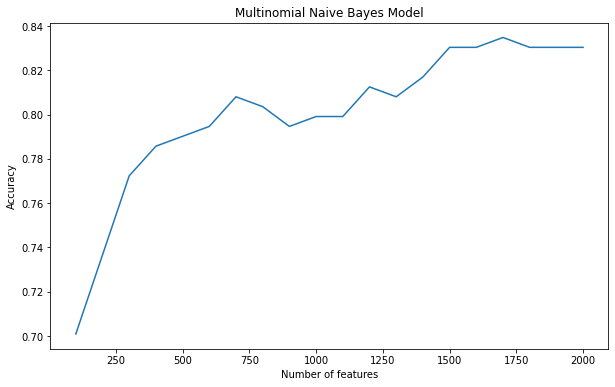

In [350]:
mnb_accu = pd.DataFrame(mnb_tfidf_accuracies, columns=['topwords', 'accuracy'])
fig = plt.figure(figsize=(10,6))
plt.plot(mnb_accu.topwords, mnb_accu.accuracy, label='MultinomialNB')
#plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Multinomial Naive Bayes Model")

In [351]:
# Logistic
possible_n = [100 * i for i in range(1, 21)]

lgr_tfidf_accuracies = []

for i, n in enumerate(possible_n):
    metr = train_with_n_topwords(n, model_name="LogisticRegression")[0]
    lgr_tfidf_accuracies.append([n, metr])

N of topwords: 100 alpha: 1.0 accuracy: 0.7366071428571429
N of topwords: 200 alpha: 1.0 accuracy: 0.7410714285714286
N of topwords: 300 alpha: 1.0 accuracy: 0.7633928571428571
N of topwords: 400 alpha: 1.0 accuracy: 0.78125
N of topwords: 500 alpha: 1.0 accuracy: 0.7901785714285714
N of topwords: 600 alpha: 1.0 accuracy: 0.7857142857142857
N of topwords: 700 alpha: 1.0 accuracy: 0.8035714285714286
N of topwords: 800 alpha: 1.0 accuracy: 0.8125
N of topwords: 900 alpha: 1.0 accuracy: 0.8125
N of topwords: 1000 alpha: 1.0 accuracy: 0.8080357142857143
N of topwords: 1100 alpha: 1.0 accuracy: 0.8125
N of topwords: 1200 alpha: 1.0 accuracy: 0.8125
N of topwords: 1300 alpha: 1.0 accuracy: 0.8080357142857143
N of topwords: 1400 alpha: 1.0 accuracy: 0.8169642857142857
N of topwords: 1500 alpha: 1.0 accuracy: 0.8169642857142857
N of topwords: 1600 alpha: 1.0 accuracy: 0.8125
N of topwords: 1700 alpha: 1.0 accuracy: 0.8169642857142857
N of topwords: 1800 alpha: 1.0 accuracy: 0.8169642857142857


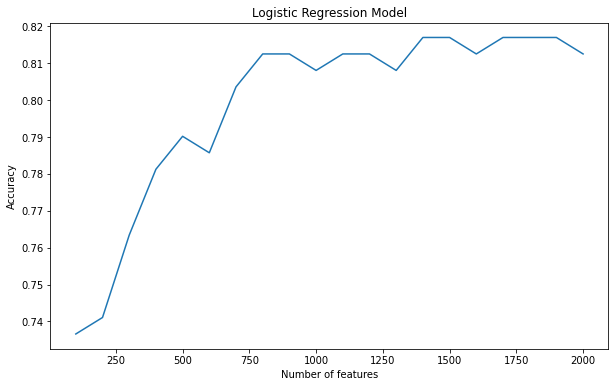

In [352]:
lgr_accu = pd.DataFrame(lgr_tfidf_accuracies, columns=['topwords', 'accuracy'])
fig = plt.figure(figsize=(10,6))
plt.plot(lgr_accu.topwords, lgr_accu.accuracy, label='LogisticRegression')
#plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Model")
fig.savefig("model_lgr_large_100k.png")

In [353]:
# SVM
possible_n = [100 * i for i in range(1, 22)]

svc_tfidf_accuracies = []

for i, n in enumerate(possible_n):
    metr = train_with_n_topwords(n, model_name="LinearSVC")[0]
    svc_tfidf_accuracies.append([n, metr])

N of topwords: 100 alpha: 1.0 accuracy: 0.7366071428571429
N of topwords: 200 alpha: 1.0 accuracy: 0.7455357142857143
N of topwords: 300 alpha: 1.0 accuracy: 0.75
N of topwords: 400 alpha: 1.0 accuracy: 0.7589285714285714
N of topwords: 500 alpha: 1.0 accuracy: 0.7723214285714286
N of topwords: 600 alpha: 1.0 accuracy: 0.7767857142857143
N of topwords: 700 alpha: 1.0 accuracy: 0.7589285714285714
N of topwords: 800 alpha: 1.0 accuracy: 0.7723214285714286
N of topwords: 900 alpha: 1.0 accuracy: 0.78125
N of topwords: 1000 alpha: 1.0 accuracy: 0.7857142857142857
N of topwords: 1100 alpha: 1.0 accuracy: 0.7946428571428571
N of topwords: 1200 alpha: 1.0 accuracy: 0.7946428571428571
N of topwords: 1300 alpha: 1.0 accuracy: 0.8035714285714286
N of topwords: 1400 alpha: 1.0 accuracy: 0.7991071428571429
N of topwords: 1500 alpha: 1.0 accuracy: 0.7991071428571429
N of topwords: 1600 alpha: 1.0 accuracy: 0.8080357142857143
N of topwords: 1700 alpha: 1.0 accuracy: 0.8169642857142857
N of topwords:

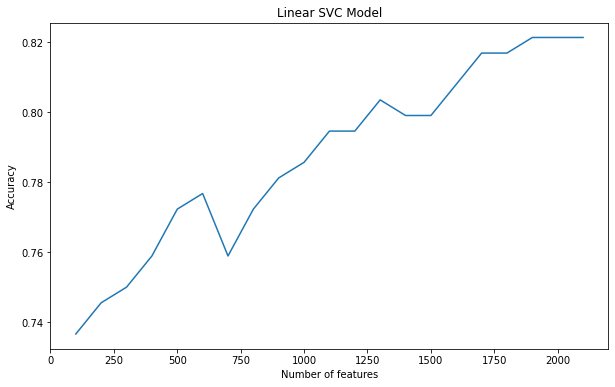

In [354]:
svc_accu = pd.DataFrame(svc_tfidf_accuracies, columns=['topwords', 'accuracy'])
fig = plt.figure(figsize=(10,6))
plt.plot(svc_accu.topwords, svc_accu.accuracy, label='LinearSCV')
#plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Linear SVC Model")
fig.savefig("model_svc_large_100k.png")

Text(0.5, 1.0, 'MultinomialNB vs. LinearSVC vs. LogisticRegression models')

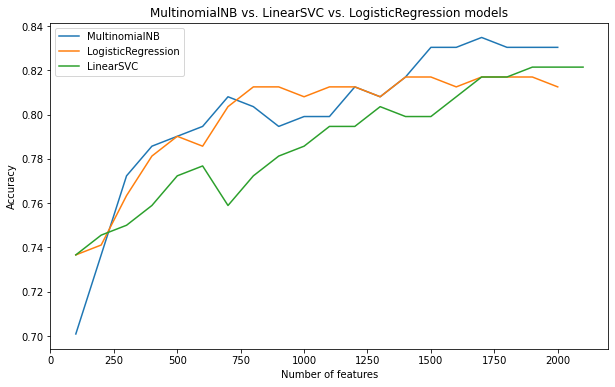

In [355]:
fig = plt.figure(figsize=(10,6))
plt.plot(mnb_accu.topwords, mnb_accu.accuracy, label='MultinomialNB')
plt.plot(lgr_accu.topwords, lgr_accu.accuracy, label='LogisticRegression')
plt.plot(svc_accu.topwords, svc_accu.accuracy, label='LinearSVC')
plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("MultinomialNB vs. LinearSVC vs. LogisticRegression models")